# **MLR-Sound-Prediction**

###Regina González

Se importaron los datos del archivo "data.csv" al ambiente de trabajo, para después imprimir las dimensiones de éste... Igualmente, se imprime un resumen de las primeras 15 filas de datos.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
print(f"✅ Datos cargados: {data.shape[0]} filas, {data.shape[1]} columnas.\n")
print("🔍 Primeras 15 filas:")
display(data.head(15))

✅ Datos cargados: 1503 filas, 6 columnas.

🔍 Primeras 15 filas:


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


Se separan los datos para entrenamiento y prueba con una proporción de 70/30, de forma aleatoria. Como en el punto anterior, se imprimen las dimensiones tanto de los datos de entrenamiento como los de prueba y se comprueba si la suma de los datos es la misma que la original.

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

print(f"📊 Dimensiones del conjunto de entrenamiento: {train.shape}")
print(f"📊 Dimensiones del conjunto de validación: {test.shape}")

if train.shape[0] + test.shape[0] == data.shape[0]:
    print("✅ La división de datos es correcta: la suma coincide con el total de observaciones.")
else:
    print("⚠️ Advertencia: La suma de los datos de entrenamiento y validación no coincide con el total de observaciones.")


📊 Dimensiones del conjunto de entrenamiento: (1052, 6)
📊 Dimensiones del conjunto de validación: (451, 6)
✅ La división de datos es correcta: la suma coincide con el total de observaciones.


Se entrenó un modelo de regresión lineal múltiple que hace que las primeras 5 variables del sistema, intenten predecir la sexta. Se imprime un resumen del modelo donde podemos ver los coeficientes de cada variable y su p-value correspondiente.

In [3]:
import statsmodels.api as sm

y_train = train['presion']
X_train = train.drop(columns=['presion'])
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

print("\n📊 Valores de p-values:")
for var in ['angulo', 'frecuencia', 'longitud', 'velocidad', 'espesor']:
    print(f"➡️ {var.capitalize()}: {model.pvalues.get(var, 'No disponible')}")



                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.38e-164
Time:                        19:59:58   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

Se llegó a una conclusión sobre la significancia de las variables a partir de los resultados del modelo.

***Los resultados del análisis revelaron que todos los factores evaluados tienen una influencia estadísticamente significativa (p < 0.05) sobre la variable en estudio. Sin embargo, los coeficientes de regresión indican que el espesor y la longitud son los predictores más robustos, ejerciendo un mayor impacto en el modelo.***

Se calculó el RSE y la 𝑅2 del modelo, tanto para los datos de entrenamiento como para los datos de validación.

In [4]:
import numpy as np

# Evaluación en el conjunto de entrenamiento
RSE_train = np.sqrt(model.scale)
R2_train = model.rsquared
print(f"📊 RSE (entrenamiento): {RSE_train:.4f}")
print(f"📊 R² (entrenamiento): {R2_train:.4f}")

# Evaluación en el conjunto de validación
y_test = test['presion']
X_test = test.drop(columns=['presion'])
X_test = sm.add_constant(X_test)

y_pred = model.predict(X_test)

RSS_test = np.sum((y_test - y_pred) ** 2)
TSS_test = np.sum((y_test - np.mean(y_test)) ** 2)

n_test, m_test = X_test.shape

RSE_test = np.sqrt(RSS_test / (n_test - m_test - 1))
R2_test = 1 - (RSS_test / TSS_test)

print(f"📊 RSE (validación): {RSE_test:.4f}")
print(f"📊 R² (validación): {R2_test:.4f}")


📊 RSE (entrenamiento): 4.7914
📊 R² (entrenamiento): 0.5214
📊 RSE (validación): 4.9052
📊 R² (validación): 0.4983


Por último, se generó un scatter plot para poder visualizar mejor los datos.

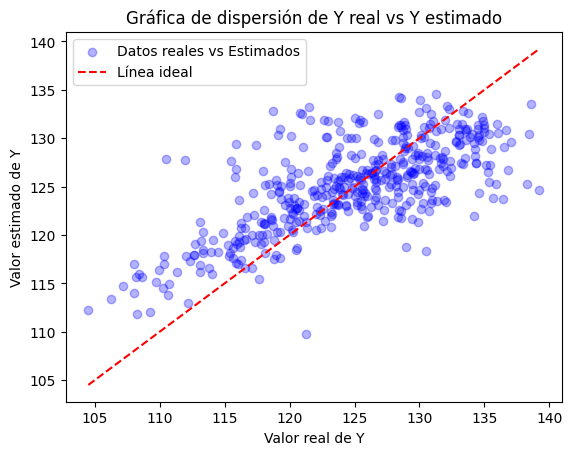

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3, color='blue', label='Datos reales vs Estimados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea ideal')
plt.xlabel('Valor real de Y')
plt.ylabel('Valor estimado de Y')
plt.title('Gráfica de dispersión de Y real vs Y estimado')
plt.legend()
plt.show()


Conclusión: el análisis del modelo muestra que funciona de manera parecida tanto con los datos con los que fue entrenado como con los datos nuevos que se usaron para validarlo. Su capacidad para hacer predicciones no es muy alta, ya que el R², que mide qué tan bien el modelo explica los datos, es de 0.52 en entrenamiento y 0.50 en validación. Además, el RSE, que indica el margen de error en las predicciones, tiene valores muy cercanos en ambos casos. Esto significa que el modelo no está demasiado ajustado a los datos de entrenamiento, pero tampoco es muy preciso al hacer predicciones.

